In [3]:
from functions.hawkes_process import *
from functions.GOF import *
from functions.compensator import *
from functions.estimator_class import loglikelihood_estimator_bfgs
from functions.estimator_class_multi_rep import *
from functions.multivariate_exponential_process import *
import csv
import scipy

In [4]:
np.random.seed(0) 

### Simulation of a Marked Exponential Hawkes Process

We start by simulating a unidimensionnal Hawkes process denoted $N$. The intensity of the process is given by the formula : 
\begin{equation}
   \lambda(t) =   m + \int_{(-\infty ,t)\times \mathcal{E} } a e^{-b(t-s)} \phi_{\gamma, \psi}(\kappa) N(ds \times d\kappa),
\end{equation}

with $\kappa$ beeing i.i.d. random variable with a  c.d.f $F_\psi$,a dmitiing a density $f_\psi$.

In [4]:
m, a, b = 0.8, -1, 2
Tmax = 5
phi_arg = 0.3

## taking kappa i.i.d following a exponential distribution of parameter 1
def F(mark,time,psi):
    return(scipy.stats.expon.cdf(mark, scale = psi))

def phi(mark, gamma, psi):
    return((psi-gamma)/psi*np.exp(mark*gamma))

def f(mark,t, psi):
    return(psi*np.exp(-psi*mark))

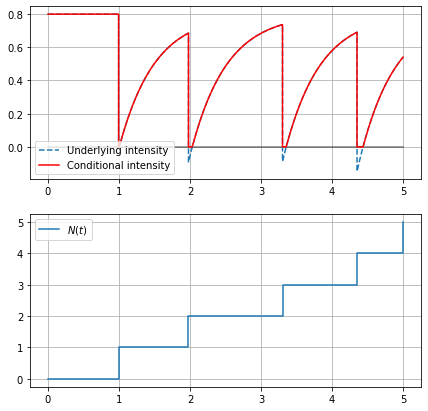

In [5]:
hawkes = exp_thinning_hawkes_marked(m=m,
                                    a=a, 
                                    b=b, 
                                    F = F ,
                                    arg_F = {'psi':1},
                                    phi=phi, 
                                    arg_phi = {'gamma': phi_arg},
                                    max_time = Tmax)


hawkes.simulate()

fig, ax = plt.subplots(2,1, figsize=(7,7))
hawkes.plot_intensity(ax =ax)

We now consider a multidimensionnal Hawkes process for which the intensity $\lambda_i$ of the i-th subprocess takes the form : $\begin{equation}
   \lambda_{i}(t) =   m_i + \sum_{j=1}^{d} \int_{(-\infty ,t)\times \mathcal{E}} a_{ij} e^{-b_i(t-s)} \phi_{\gamma, \psi}(\kappa) N^j(ds \times d\kappa),
\end{equation}$

with $\kappa$ beeing i.i.d. random variable with a  c.d.f $F_\psi$,a dmitiing a density $f_\psi$.

In [6]:
m = np.array([0.5, 0.2]).reshape((2,1))
a = np.array([[0.4, 0.2,], 
                  [-0.4, 0.3]] )
b = np.array([[1],[1.5]])


Tmax = 10
phi_arg = 0.5

def F(mark,time,psi):
    return(scipy.stats.expon.cdf(mark, scale = psi))

def phi(mark, gamma, psi):
    return((psi-gamma)/psi*np.exp(mark*gamma))

def f(mark,t, psi):
    return(psi*np.exp(-psi*mark))

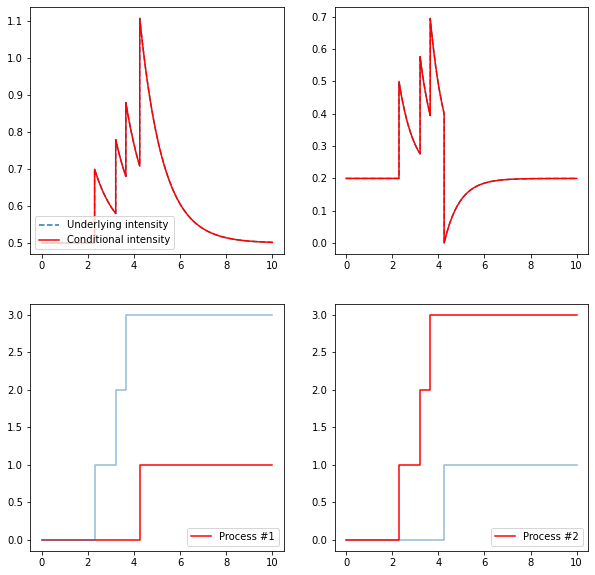

In [7]:
hawkes_multi = multivariate_exponential_hawkes_marked(m=m,
                                                      a=a, 
                                                      b=b, 
                                                      phi = phi, 
                                                      F= F, 
                                                      arg_phi={'gamma':phi_arg}, 
                                                      arg_F={'psi': 2}, 
                                                      max_time=10)

hawkes_multi.simulate()

fig,ax = plt.subplots(2,2, figsize = (10,10))
hawkes_multi.plot_intensity(ax = ax)

# Apply testing procedure

We present here the code use to apply different test procedure on Hawkes process. 

## Test on one coefficient

Simulation of 500 repetition of a bidimensionnal Hawkes process.

In [7]:
from functions.hawkes_process import *
from functions.GOF import *
from functions.compensator import *
from functions.estimator_class import loglikelihood_estimator_bfgs
from functions.estimator_class_multi_rep import *
from functions.multivariate_exponential_process import *
import scipy

In [8]:
np.random.seed(0)

In [9]:
## simualtion of the observations

m = np.array([0.5, 0.8]).reshape((2,1))
a = np.array([[0.4, 0.2], 
                  [0.4, 0.3]] )
b = np.array([[1],[1.5]])


tList = []

for k in range(50):
    process = multivariate_exponential_hawkes( m=m, a=a, b=b , max_time=50)
    process.simulate()
    tList += [process.timestamps]

In [10]:
estimator = estimator_multidim_multi_rep(dimension=2)
estimator.fit(tList, nb_cores=4)

array([0.73571013, 0.95847369, 0.3265512 , 0.24298159, 0.53029378,
       0.25151474, 1.44457147, 2.79619722])

In [12]:
stat = estimator.test_one_coeff(3,0.4)  
print(stat)

{'estimatorList': array([-0.30526967, -0.40266777, -2.00764279, -1.26022852, -0.76414066,
       -0.68796804, -2.03110028, -0.12721959,  0.36993073, -1.22800643,
       -0.22936956,  0.61528723,  0.35774357, -0.66106963, -0.09805306,
        0.07764009, -0.39996034,  0.25058243, -2.1462961 ,  0.5397639 ,
       -2.12974919, -0.28890165, -2.45609185, -0.84138254,  1.31543496,
       -0.69006539, -1.65052128,  0.74923647, -0.9588872 , -0.85061079,
       -1.1659788 , -0.43327468, -1.34684169, -0.51228173, -0.32450134,
       -0.91842853, -0.69754269,  0.39782665, -0.33171295,  0.40503401,
        3.19920287, -0.20700151, -0.85656923, -0.85612821, -2.54412889,
       -0.74021333, -1.33099411, -0.12440055, -1.15291064,  0.28080631]), 'KStest_stat': np.float64(0.29905491963706515), 'KStest_pval': np.float64(0.00018416242212428925)}


### Test of equality between coefficients 

In [1]:
stat = estimator.test_equality_coeff(6,7)

NameError: name 'estimator' is not defined

In [6]:
import rpy2
import rpy2.robjects as robjects
from   rpy2.robjects import vectors
import numpy as np
import rpy2.robjects.packages as rpackages

rvector=robjects.r('vector')
qqconf_lib = rpackages.importr('qqconf')
stats = rpackages.importr('stats')
rprint = robjects.globalenv.find("print")



set = np.random.uniform(0,1,100)

estimator_list = robjects.FloatVector(set)
 
qqconf_lib.qq_conf_plot(
          obs = estimator_list, 
          distribution = stats.qunif)

R[write to console]: Erreur dans as.character(substitute(distribution)) : 
  cannot coerce type 'closure' to vector of type 'character'



RRuntimeError: Erreur dans as.character(substitute(distribution)) : 
  cannot coerce type 'closure' to vector of type 'character'


### Test on the model used for estimation

In [9]:
### data generation
m=2
a = -2
b = 2.1
Tmax = 500


NbSample = 500
SubSample = int(NbSample**(2/3) )



tList = []

for k in range(500):
    hawkes_ex =   exp_thinning_hawkes(m=m, a = -2, b=b, max_time=Tmax)
    hawkes_ex.simulate()
    tList += [hawkes_ex.timestamps]

#%%


learner = estimator_unidim_multi_rep()
learner.fit(tList)


array([ 2.0214724 , -2.05389067,  2.1208893 ])

### Test of the self-exiting assumption

We test here the null hypothesis $$\mathcal{H}_0 : \text{data are i.i.d represetation of a poisson model with an unknown parameter} $$

In [12]:
stats_poisson = learner.GOF_bootstrap(compensator_func=poisson_compenasator, sup_compensator=100, SubSample_size=SubSample, Nb_SubSample=500)

In [ ]:
stats_hawkes = learner.GOF_bootstrap(sup_compensator=100, SubSample_size=SubSample, Nb_SubSample=500)

### Test of the inhibition assumption

We test here the null hypothesis $$\mathcal{H}_0 : \text{data are i.i.d represetation of a hawkes model inhibition} $$

In [13]:
stats_hawkes_inhib = learner_hawkes_inhib.GOF_bootstrap(sup_compensator=100, SubSample_size=SubSample, Nb_SubSample=500)

NameError: name 'learner_hawkes_inhib' is not defined

In [8]:
learner_hawkes_inhib = estimator_unidim_multi_rep(a_bound=None)
learner_hawkes_ex = estimator_unidim_multi_rep(a_bound=0)

learner_hawkes_inhib.fit(tList)
learner_hawkes_ex.fit(tList)


#%%
stats_hawkes_inhib = learner_hawkes_inhib.GOF_bootstrap(sup_compensator=100, SubSample_size=SubSample, Nb_SubSample=500)
stats_hawkes_ex = learner_hawkes_ex.GOF_bootstrap(sup_compensator=100, SubSample_size=SubSample, Nb_SubSample=500)



AttributeError: 'estimator_unidim_multi_rep' object has no attribute 'GOF_procedure'

## Test of 